# Introduction
**Problem Statement and Importance:**
I aim to understand patterns in crime and crime rates within Mexico and how economic factors like GDP contribute to any differences or patterns. Understanding the crime rates in Mexico will allow me to comprehend Mexico's past and potential future. Also, in the article, [How Mexican Judicial Reform May Have Fueled Crime: Arrest Trends and Trust Erosion](https://www.thecgo.org/research/how-mexican-judicial-reform-may-have-fueled-crime/), it discusses how a change in Mexico's law system intended to reduce crime but suggests otherwise. "From a policy perspective, we are interested in gaining a better understanding of how Mexico’s conversion to an adversarial criminal law system—a shift intended to increase the cost of committing a crime—might have molded crime rates." It raises the question if this shift in the system had a positive or negative effect. This EDA may provide some insight to aid this article and its statement.

**Approach:**
I will analyze top crime types and economic factors using a crime dataset of Mexico from 2015 to 2023, along with the GDP dataset for those years. The methods that I will utilize include data visualizations such as scatterplots to find possible correlation patterns and making functions to assist with efficiency when it comes to looking for patterns or trends in the states of Mexico. Additionally, I will incorporate the GDP dataset as a numerical variable to assess if the economy plays a role with all crime or certain crime types.

**Benefits:**
My analysis can provide insights for policymakers and law enforcement to develop targeted interventions and allocate resources effectively based on regional challenges in Mexico. Also, it can be used to see if any recent policies have had an effect.

**Consumer Impact:**
Stakeholders can make informed decisions and implement strategies to reduce crime, improve socio-economic conditions, and create safer communities across Mexico. For the general public, gaining an insightful understanding of recent crime trends in Mexico can serve as a reference point for travel, work, and school-related decisions. Also, governments foreign to Mexico may see this and may feel the need to aid Mexico with its crime.

In [216]:
import numpy as np #allows for efficient calculations and manipulation with arrays
import pandas as pd #allows for the use of dataframes and quick insight to the dataset
import matplotlib.pyplot as plt #used with seaborn also allows for object-oriented plotting
import seaborn as sns # allows for visualizations
sns.set_style('darkgrid') # allow for some contrast between the figure and the geometric objects in plots
import warnings # ignore warnings
warnings.filterwarnings('ignore')

The dataset below is from Kaggle. The purpose of this dataset is to compile a variety of crimes in Mexico and offer the ability to inquire about patterns or differences in crime. The initial collection of this data seems to have occurred from 2015 to 2023, and the page of this dataset states that it is updated quarterly. The dataset includes 9 fields: year, entity_code, entity, affected_legal_good, type_of_crime, subtype_of_crime, modality, month, and count. Fortunately, this dataset has already been cleaned and is ready to be analyzed, showing no irregularities in its data. [Mexican Crime Statistics:Comprehensive (2015-2023)
](https://www.kaggle.com/datasets/elanderos/official-crime-stats-mexico-2015-2023)

In [217]:
mex_crime_raw = pd.read_csv('mexico_crime.csv')

mex_crime_raw.head()

year  entity_code          entity        affected_legal_good type_of_crime  \
0  2015            1  Aguascalientes  Life and bodily integrity      Homicide   
1  2015            1  Aguascalientes  Life and bodily integrity      Homicide   
2  2015            1  Aguascalientes  Life and bodily integrity      Homicide   
3  2015            1  Aguascalientes  Life and bodily integrity      Homicide   
4  2015            1  Aguascalientes  Life and bodily integrity      Homicide   

       subtype_of_crime              modality    month  count  
0  Intentional Homicide          With firearm  January      3  
1  Intentional Homicide     With sharp weapon  January      1  
2  Intentional Homicide  With another element  January      0  
3  Intentional Homicide         Not specified  January      2  
4          Manslaughter          With firearm  January      0

The dataset below is from Mexico's official government website. The purpose of this data is to inform the public about Mexico's status regarding socioeconomic factors. The initial collection of this GDP dataset is from 1993 to 2023. This dataset contains only two fields: year and GDP. I will focus on fixing the GDP values and irrelevant years by manipulating the dataset to only include the years I am interested in (i.e., 2015-2023) and rounding the scientific notation GDP values. [Data Mexico](https://www.economia.gob.mx/datamexico/en/profile/geo/mexico)

In [218]:
mex_gdp = pd.read_csv('inegi_gdp_2024-03-28T23_41_51.407Z.csv')
mex_gdp.head()

Year          GDP
0  1993  655804.6375
1  1994  683582.0125
2  1995  643906.2375
3  1996  684588.4875
4  1997  733534.7250

## Cleaning/Processing the Data

In [219]:

mex_crime_raw.dropna(inplace=True) # deal with missing values

mex_crime_raw['count'] = mex_crime_raw['count'].astype(int)  # Convert count column to int


In [220]:
#shorten states name and lowercase them
mex_crime_raw['entity'] =  [i.replace('Coahuila de Zaragoza', 'Coahuila') for i in mex_crime_raw['entity']]
mex_crime_raw['entity'] =  [i.replace('Michoacán de Ocampo', 'Michoacán') for i in mex_crime_raw['entity']]
mex_crime_raw['entity'] =  [i.replace('México', 'México State') for i in mex_crime_raw['entity']]
mex_crime_raw['entity'] =  [i.replace('Veracruz de Ignacio de la Llave', 'Veracruz') for i in mex_crime_raw['entity']]
mex_crime_raw['entity'] =  [i.lower() for i in mex_crime_raw['entity']]




In [221]:
rel_mex_gdp = mex_gdp.loc[22:].copy()

rel_mex_gdp['GDP'] = [round(num,2) for num in rel_mex_gdp['GDP']]
rel_mex_gdp = rel_mex_gdp.reset_index() # start the index from 0
rel_mex_gdp = rel_mex_gdp.drop('index',axis=1)
rel_mex_gdp.columns = rel_mex_gdp.columns.str.lower()
rel_mex_gdp

year         gdp
0  2015  1082369.18
1  2016  1101264.36
2  2017  1121829.64
3  2018  1143681.80
4  2019  1140266.26
5  2020  1045508.30
6  2021  1102626.50
7  2022  1144430.12
8  2023  1180775.29

# Exploring Mexico's Crime

In [222]:
crime_shape = mex_crime_raw.shape
print('There is ' + str(crime_shape[0]) + ' rows and there is '+ str(crime_shape[1])+' columns present')

There is 332416 rows and there is 9 columns present


In [223]:
mex_crime_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332416 entries, 0 to 332415
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   year                 332416 non-null  int64 
 1   entity_code          332416 non-null  int64 
 2   entity               332416 non-null  object
 3   affected_legal_good  332416 non-null  object
 4   type_of_crime        332416 non-null  object
 5   subtype_of_crime     332416 non-null  object
 6   modality             332416 non-null  object
 7   month                332416 non-null  object
 8   count                332416 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 22.8+ MB


In [224]:
mex_crime_raw.describe()

year    entity_code          count
count  332416.000000  332416.000000  332416.000000
mean     2018.924528      16.500000      52.012960
std         2.546545       9.233107     202.115018
min      2015.000000       1.000000       0.000000
25%      2017.000000       8.750000       0.000000
50%      2019.000000      16.500000       2.000000
75%      2021.000000      24.250000      26.000000
max      2023.000000      32.000000    8421.000000

Initializing some constants

In [225]:
mex_states = pd.unique(mex_crime_raw.entity) #store the states
mex_states

array(['aguascalientes', 'baja california', 'baja california sur',
       'campeche', 'coahuila', 'colima', 'chiapas', 'chihuahua',
       'ciudad de méxico state', 'durango', 'guanajuato', 'guerrero',
       'hidalgo', 'jalisco', 'méxico state', 'michoacán', 'morelos',
       'nayarit', 'nuevo león', 'oaxaca', 'puebla', 'querétaro',
       'quintana roo', 'san luis potosí', 'sinaloa', 'sonora', 'tabasco',
       'tamaulipas', 'tlaxcala', 'veracruz', 'yucatán', 'zacatecas'],
      dtype=object)

In [226]:
# store the relevant years at it will be constant throughout the eda
years = pd.unique(mex_crime_raw.year)

### Visualized Exploration of Crime 

In [227]:
#functions to facilitate the correlation for scatter plots 
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t[x])
    y_standard = standard_units(t[y])
    return np.average(x_standard * y_standard)


Getting an idea of the states in Mexico and where they fall in the contect of total crime count

In [228]:
plt.rcParams['lines.linewidth'] = 8
plt.rcParams['font.size'] = 40


In [229]:
#dataframe with the total crime counts for each state for 2015-2023
total_crime_thru_years_state =  pd.DataFrame(mex_crime_raw.groupby('entity')['count'].sum()).reset_index()


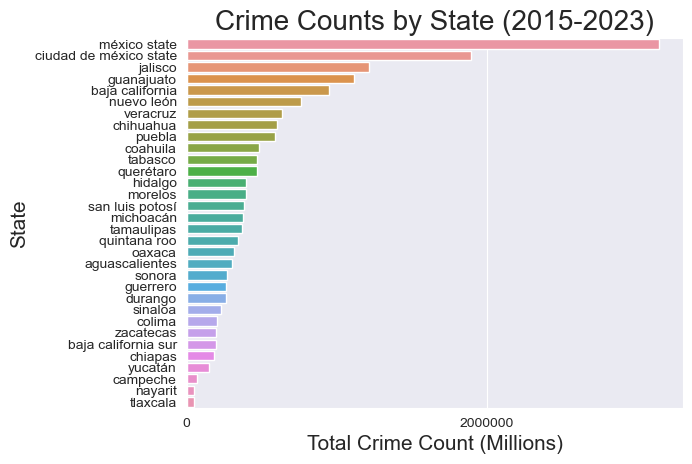

In [230]:
#Map the crime counts by state
sorted_crime = total_crime_thru_years_state.sort_values(by='count',ascending=False)
sns.barplot(data=sorted_crime,y='entity',x='count')

plt.title('Crime Counts by State (2015-2023)',fontsize = 20)
plt.xlabel('Total Crime Count (Millions)',fontsize=15)
plt.ylabel('State',fontsize= 15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ticklabel_format(axis= 'x',style='Plain')
plt.show()


In [231]:
#top ten states with high crime count
top_ten_states_df =  sorted_crime.iloc[:10]
top_ten_states = top_ten_states_df.entity.reset_index().entity



### Look at the Top Ten States Leading in Crime
#### Goals:
- Make function to facilitate in line ploting for the top ten states
- Get an idea of where crime is heading for these states

In [232]:

def trend_crime(state_name,facet=False,row=0,column=0,color= 'b'):
    """
    string row=int column=int facet=boolean color=string-> plot
    expects a state name or 
    expects state name, the row index, the column index and color=string if facet=True
    and then returns a line plot of the crime count for 2015-2023 for the given state name 
    """
    if not facet:
        df = mex_crime_raw.loc[mex_crime_raw['entity'] == state_name ].groupby('year').sum().reset_index()
        plt.title('Total Crime Count for '+state_name.capitalize())
        sns.lineplot(df,x='year',y='count')
        plt.ylim(0)
        plt.ylabel('Crime Count')
    else:
        df = mex_crime_raw.loc[mex_crime_raw['entity'] == state_name ].groupby('year').sum().reset_index()
        
        trend_crime_plot = sns.lineplot(df,x='year',y='count',ax = ax[row][column],color=f'{color}')
        trend_crime_plot.set_title(state_name.capitalize())
        trend_crime_plot.set_ylabel('Crime Count')
        trend_crime_plot.set_ylim(0)

In [233]:
#color palatte for the facets
colors_mex = ['royalblue','maroon','darkgreen','k','saddlebrown','indigo','darkcyan','darkgoldenrod','deeppink','dimgray']

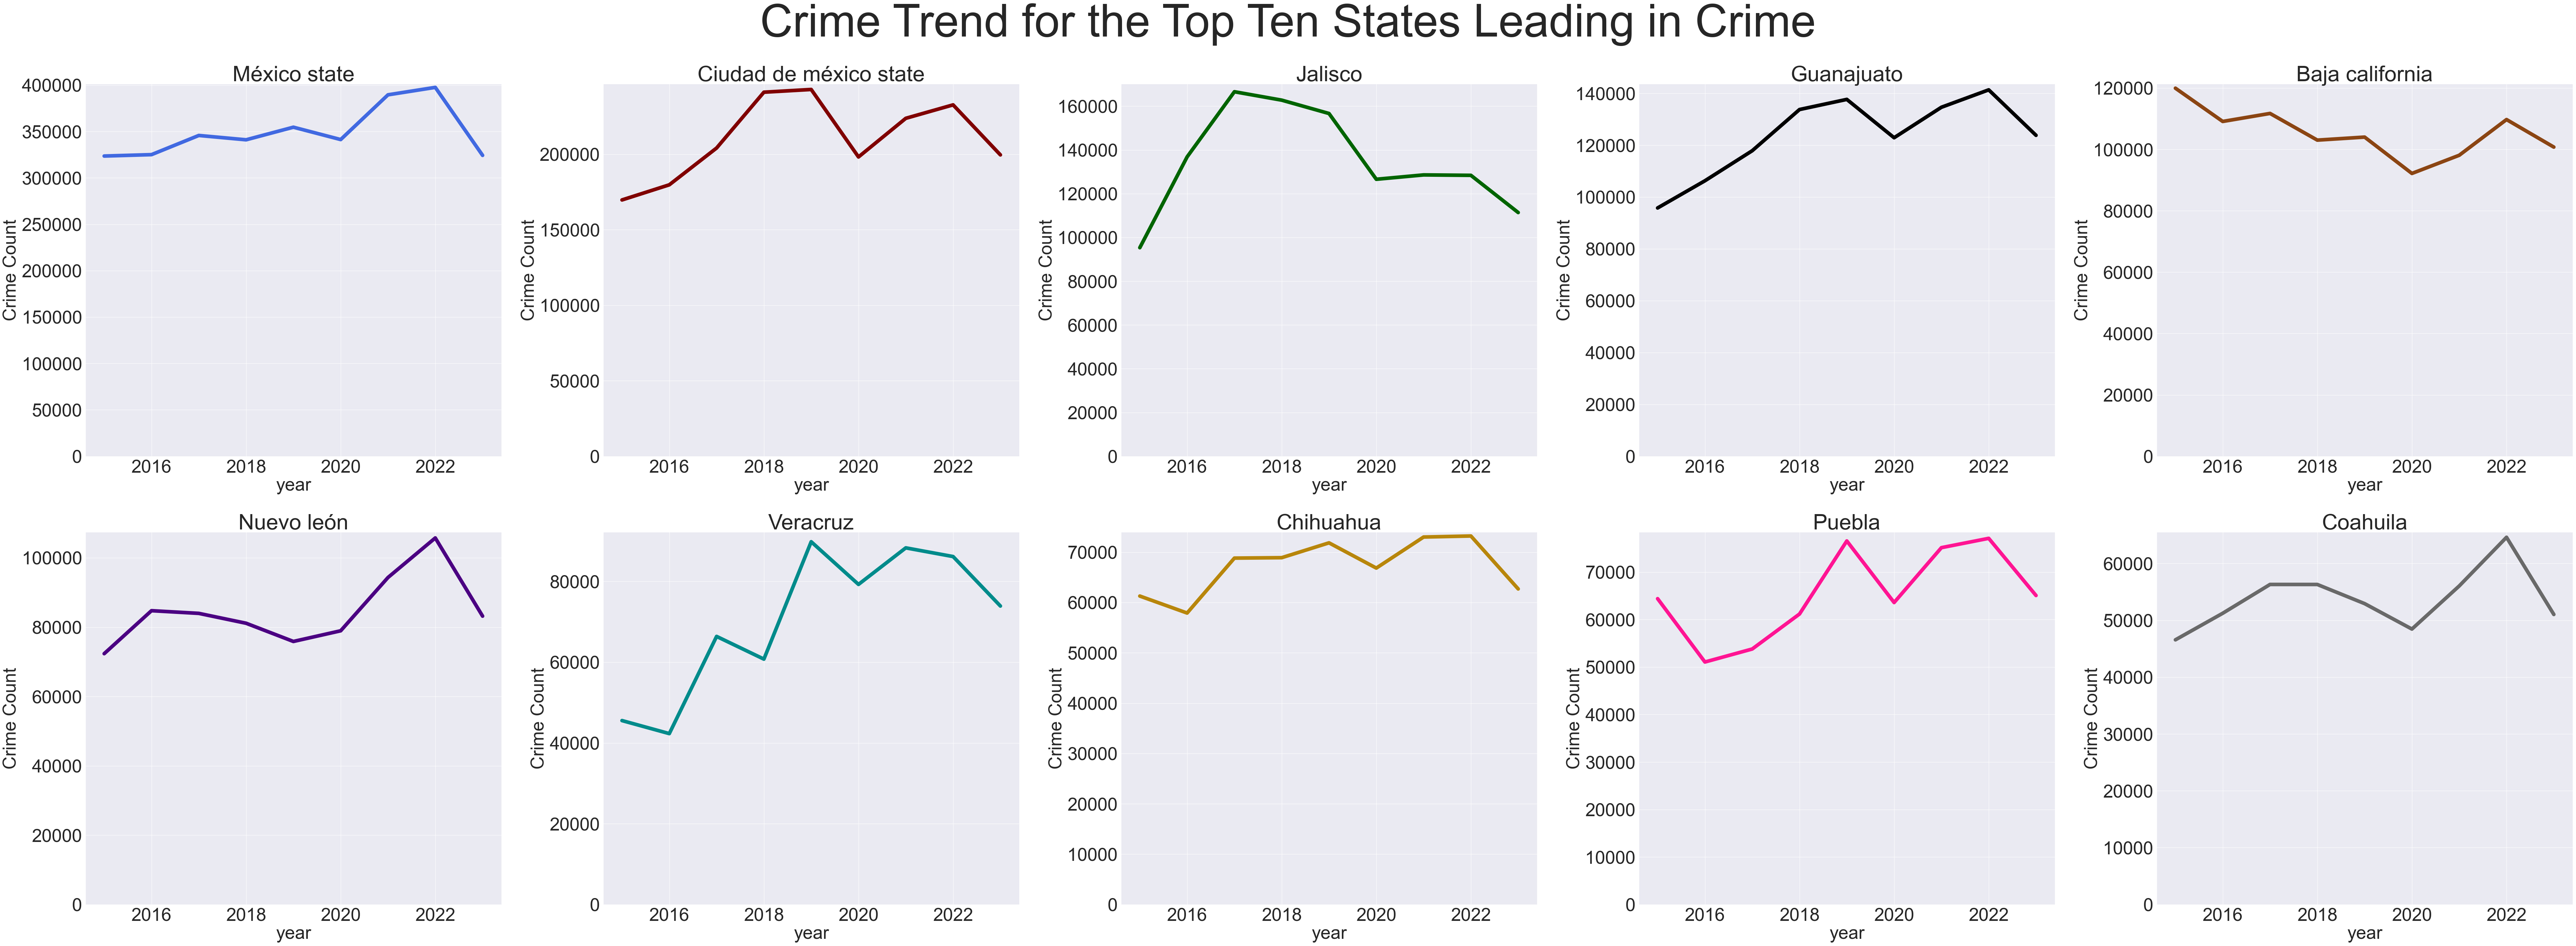

In [234]:
#facets showing the trend in crime count for the top ten states
fig, ax = plt.subplots(2,5,figsize=(80,30))

# i is set for 0-9
# performing i//5 will divide and then round to the whole number (i.e. 2//5 = 0) 
# which helps assign the plot to a row 
# I chose five for the denominator in the row evaluation because I'm outputting 10 plots.
# and for the column because of the number of columns.
# performing i%5 will give the ints 0-4 which helps assign the plot to a column for each row
[trend_crime(state,facet=True,row=i//5,column=i%5, color = colors_mex[i]) 
 for i,state in enumerate(top_ten_states)]


fig.suptitle('Crime Trend for the Top Ten States Leading in Crime',fontsize = 100)

plt.tight_layout()



##### Quick Insight:
It seems that crime has started to decrease for these states for this time frame. 
Could it be because of recent changes in Mexico judicial system?

## Crime and GDP
#### Goals
- Explore the trend with GDP values and total crime count values
- Explore the correlation with GDP values and total crime count values

In [235]:
# total crime counts for 2015-2023 for all of Mexico
total_crime_thru_years_mex = [mex_crime_raw.loc[mex_crime_raw.year == i]['count'].sum() for i in years ]


In [236]:
# working df for this sub-topic
crime_n_gdp = pd.DataFrame({'year':years,'total crime count':total_crime_thru_years_mex,'gdp':rel_mex_gdp.gdp})

crime_n_gdp

year  total crime count         gdp
0  2015            1657804  1082369.18
1  2016            1764179  1101264.36
2  2017            1939497  1121829.64
3  2018            1989935  1143681.80
4  2019            2071179  1140266.26
5  2020            1841191  1045508.30
6  2021            2044256  1102626.50
7  2022            2141979  1144430.12
8  2023            1839920  1180775.29

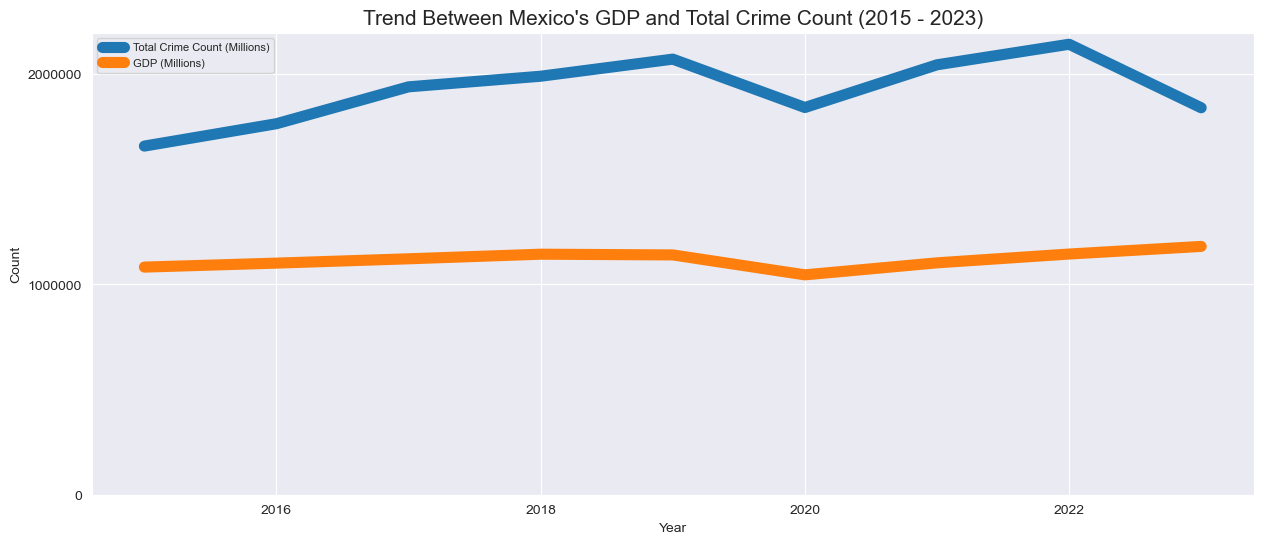

In [237]:
plt.figure(figsize=(15,6))
sns.lineplot(crime_n_gdp,x='year',y='total crime count',label='Total Crime Count (Millions)');
sns.lineplot(crime_n_gdp,x='year',y='gdp',label='GDP (Millions)');
plt.legend(fontsize =8,loc=2)
plt.ylabel('Count',fontsize = 10)
plt.xlabel('Year',fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.title("Trend Between Mexico's GDP and Total Crime Count (2015 - 2023)",fontsize= 15)
plt.ticklabel_format(style='plain', axis='both')
plt.ylim(0);


##### Quick Insight:
There is a significant amount of total crime compared to Mexico's GDP in the past decade.

The correlation coefficient for Mexico's GDP and Total Crime Count is 0.43


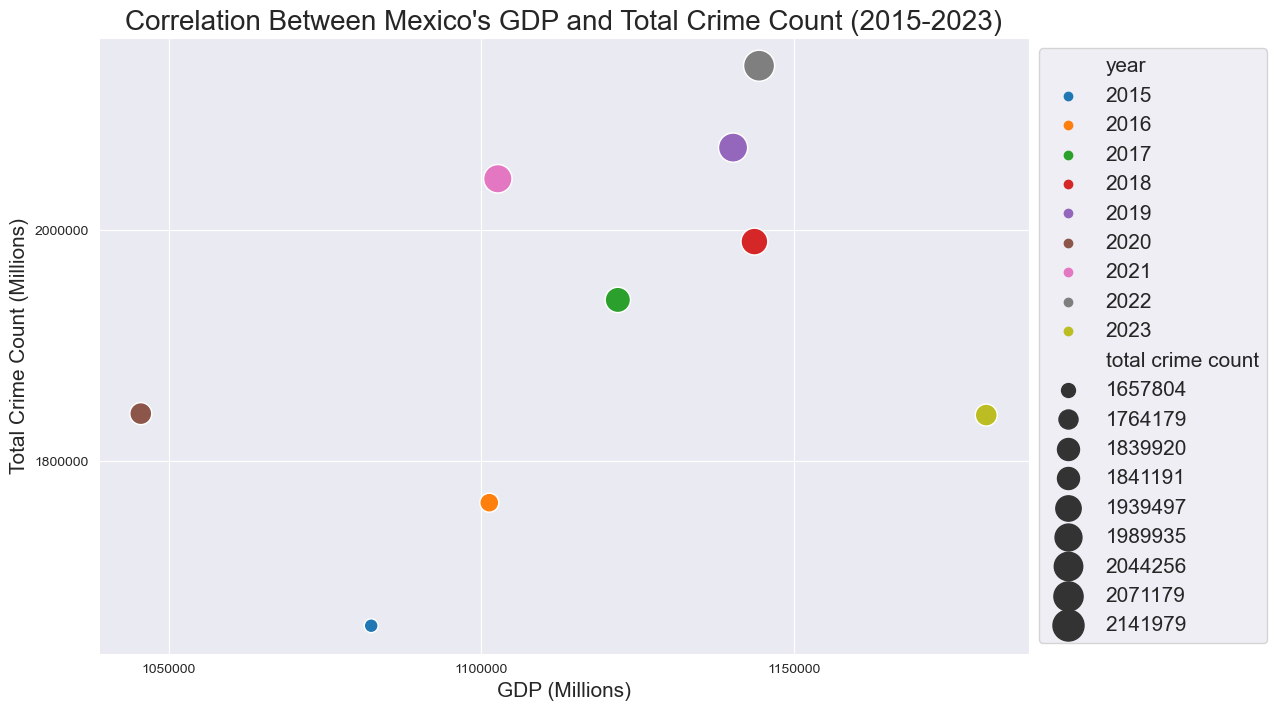

In [238]:
plt.figure(figsize=(12,8))



cc= round(correlation(crime_n_gdp,'gdp','total crime count'),2)
        
state_cc = f"The correlation coefficient for Mexico's GDP and Total Crime Count is {cc}" 
                      
print(state_cc)

sns.scatterplot(crime_n_gdp,x='gdp',y='total crime count'
                ,hue='year',palette='tab10',size='total crime count',
                sizes=(100,500)
                ,legend='full');

plt.legend(fontsize=15,loc='center left',bbox_to_anchor=(1,0.5))

plt.ylabel('Total Crime Count (Millions)',fontsize =15)
plt.xlabel('GDP (Millions)',fontsize = 15)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.title("Correlation Between Mexico's GDP and Total Crime Count (2015-2023)",fontsize= 20)
plt.ticklabel_format(style='plain', axis='both')

##### Insight:
There was a consecutive positive correlation observed from 2015 extending to 2022. Additionally, it appears that 2020 and 2023 share the same coordinates. What could have happened in those years that led to the same values? It could be due to similar reasons or different ones. For 2020, an obvious factor could be the Covid-19 Pandemic, but to determine the reason for 2023, I would need to refer to recent articles or sources that may have influenced the correlation between GDP and Crime counts for Mexico.

## Types of Crime and Statistics
#### Goals:
- Calculate the statistics of top crime types in Mexico for each year and plot the rates of the top crime types
- Make suitable functions to provide insight for this sub-topic

### Programming the Functions

In [239]:
# store the crime types
crime_types = pd.unique(mex_crime_raw.type_of_crime)
crime_types

array(['Homicide', 'Injuries', 'Feminicide', 'Abortion',
       'Other crimes against life and bodily integrity', 'Kidnapping',
       'Child trafficking', 'Abduction',
       'Other crimes against personal freedom', 'Sexual abuse',
       'Sexual harassment', 'Simple rape', 'Aggravated rape', 'Incest',
       'Other crimes against sexual freedom and security', 'Robbery',
       'Fraud', 'Embezzlement', 'Extortion', 'Property damage',
       'Dispossession', 'Other crimes against heritage or property',
       'Domestic violence',
       'Gender-based violence in all its forms other than domestic violence',
       'Non-compliance with family support obligations',
       'Other crimes against the family', 'Corruption of minors',
       'Human trafficking', 'Other crimes against society',
       'Drug trafficking (small-scale)', 'Threats', 'Burglary',
       'Prisoner escape', 'Forgery', 'Counterfeiting',
       'Environmental crimes', 'Crimes committed by public officials',
       'Elect

In [240]:
def crime_stat(year):
    """
    int -> list plot
    
    expects a year and 
    returns a list containing statistical statements and
    returns a bar plot showcasing the stated percentages for the top ten crimes in the given year
    
    """

    crime_count_df = mex_crime_raw.loc[mex_crime_raw['year'] == year].groupby('type_of_crime').sum().reset_index()
    total_crime_year = crime_n_gdp.set_index('year')['total crime count'][year]
    crime_count_df['year'] = year
    crime_count_df['percent'] = [round((i/total_crime_year)*100,2) for i in crime_count_df['count']]
    top_ten_crime_df = crime_count_df.sort_values(by='percent',ascending=False).iloc[:10]


    sns.barplot(top_ten_crime_df,y='type_of_crime',x='percent')
    plt.title('Top Crimes in Mexico(%) for '+str(year),fontsize=20)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel('Percent of Crime',fontsize=15)
    plt.ylabel('Type of Crime',fontsize=15)
  
    stat_scaffold = [f"{crime} made up " for crime in top_ten_crime_df.type_of_crime]#structure the statement
    # i found it easier to use two list comps here to output the statistical statements
    stats = [f"{stat_scaffold[i]}{percent}% in {year}" 
    for i,percent in enumerate(top_ten_crime_df.percent)]
    return stats
    

    

    

In [241]:
def spefic_crime_count(crime,year):
    """
    string int -> int
    (helper function for faceting)
    expects type of crime and a year
    returns a count for the given crime and year

    """
    crime_count_df_year = mex_crime_raw.loc[mex_crime_raw['year'] == year].groupby('type_of_crime').sum()
    total_crime = crime_count_df_year['count'][crime]
    return total_crime


In [242]:

def spefic_crime_stat(crime,year):
    """
    string int -> float
    (helper function for faceting)
    expects type of crime and a year
    returns a percent for the given crime and year

    """
    crime_count_df_year = mex_crime_raw.loc[mex_crime_raw['year'] == year].groupby('type_of_crime').sum().reset_index()
    total_crime_year = crime_n_gdp.set_index('year')['total crime count'][year]
    crime_count_df_year['year'] = year
    crime_count_df_year['percent'] = [round((i/total_crime_year)*100,2) for i in crime_count_df_year['count']]
    #top_ten_crime_df = crime_count_df.sort_values(by='percent',ascending=False).iloc[:10]
    return crime_count_df_year.set_index('type_of_crime')['percent'][crime]
    



In [243]:
def crime_stat_range(crimes=[],facet=False):
    """
    crimes[string] -> dataframe
    or
    crimes=[string(5)] facet=boolean  -> subplots(5)
    if facet=False(default)
    expects a list with just one crime type
    returns a dataframe respective to the given crime and the percent for of the crime
    for the years 2015-2023
    
    if facet=True then crime_list will expect a list of 5 crimes types (strings)
    which will then be faceted to demonstrate the trend in their respective percentage for 2015-2023
    """
    
    
    
    if facet and len(crimes) > 1 and len(crimes) != 0 :
        
 
        df_values = [(crime,year,spefic_crime_count(crime,year),spefic_crime_stat(crime,year)) 
             for crime in crime_types 
             for year in years ] #list of tuples  (type_of_crime,year,count,percent)
    
        # dataframe with crimes for 2015-2023 and the the respective count,percent for the years
        top_crime_thru_years = pd.DataFrame({'type_of_crime':[df_values[i][0] for i in np.arange(len(df_values))],
                                    'year':[df_values[i][1] for i in np.arange(len(df_values))],
                                    'crime_count':[df_values[i][2] for i in np.arange(len(df_values))],
                                    'percent':[df_values[i][3] for i in np.arange(len(df_values))]})
        #dataframes containing the percent for each crime in the given list
        crime1_df = top_crime_thru_years.loc[top_crime_thru_years['type_of_crime'] == crimes[0]]
        crime2_df = top_crime_thru_years.loc[top_crime_thru_years['type_of_crime'] == crimes[1]]
        crime3_df = top_crime_thru_years.loc[top_crime_thru_years['type_of_crime'] == crimes[2]]
        crime4_df = top_crime_thru_years.loc[top_crime_thru_years['type_of_crime'] == crimes[3]]
        crime5_df = top_crime_thru_years.loc[top_crime_thru_years['type_of_crime'] == crimes[4]]
        crime_dfs = [crime1_df,crime2_df,crime3_df,crime4_df,crime5_df]
        
        fig,ax = plt.subplots(1,5,figsize=(90,30))
        
        plots = [sns.lineplot(df,x='year',y='percent',ax = ax[i%5],color=colors_mex[i%5]) for i,df in enumerate(crime_dfs) ]
        
        
        [plots[i].set_title(crimes[i],fontsize=50) for i in np.arange(5)]

        
        
        fig.suptitle(f"Crime Trend for {crimes[0]}, {crimes[1]}, {crimes[2]}, {crimes[3]}, and {crimes[4]} in Mexico (2015-2023)",fontsize = 100)
        plt.tight_layout()
         
        
        
        
    elif len(crimes) == 1:

        df_values = [(crime,year,spefic_crime_stat(crime,year)) 
             for crime in crime_types for year in years] #list of tuples  (type_of_crime,year,percent)
    
        # dataframe with all crimes for 2015-2023 and the the respective percent for the years
        top_crime_thru_years = pd.DataFrame({'type_of_crime':[df_values[i][0] for i in np.arange(len(df_values))],
                                    'year':[df_values[i][1] for i in np.arange(len(df_values))],
                                    'percent':[df_values[i][2] for i in np.arange(len(df_values))]})
        crime_df = top_crime_thru_years.loc[top_crime_thru_years['type_of_crime'] == crimes[0]]
        return crime_df
    
    
    

    

### Query on the Types of Crime and Statistics

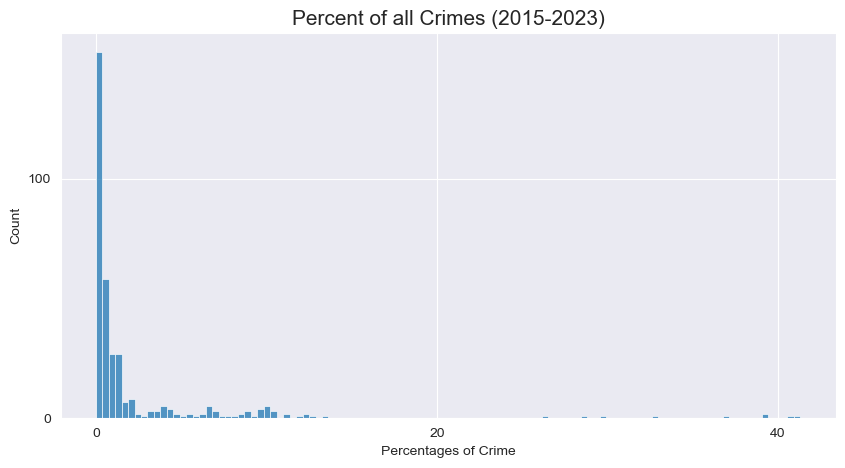

In [244]:
# dataframe with all crimes for 2015-2023 and the the respective percent for the years



df_values = [(crime,year,spefic_crime_count(crime,year),spefic_crime_stat(crime,year)) 
             for crime in crime_types for year in years] #list of tuples (type_of_crime,year,crime_count,percent)

crime_thru_years = pd.DataFrame({'type_of_crime':[df_values[i][0] for i in np.arange(len(df_values))],
                                    'year':[df_values[i][1] for i in np.arange(len(df_values))],
                                     'crime_count':[df_values[i][2] for i in np.arange(len(df_values))],
                                    'percent':[df_values[i][3] for i in np.arange(len(df_values))]})
plt.figure(figsize=(10,5))

sns.histplot(crime_thru_years.sort_values(by='percent',ascending=False),x='percent')
plt.title('Percent of all Crimes (2015-2023)',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.xlabel('Percentages of Crime',fontsize=10)

plt.show()

#### Quick Insight:
It seems that in the the 8 years the majority of crimes have leaned to be less than 5%

In [245]:
#looking for the top five crimes for 2015-2023
pd.unique((crime_thru_years.sort_values(by='crime_count',ascending=False).type_of_crime))

array(['Robbery', 'Domestic violence', 'Injuries',
       'Other common law crimes', 'Property damage', 'Threats', 'Fraud',
       'Drug trafficking (small-scale)', 'Homicide', 'Sexual abuse',
       'Dispossession', 'Embezzlement',
       'Non-compliance with family support obligations',
       'Other crimes against personal freedom',
       'Crimes committed by public officials', 'Counterfeiting',
       'Other crimes against heritage or property', 'Simple rape',
       'Other crimes against the family', 'Sexual harassment', 'Burglary',
       'Other crimes against life and bodily integrity',
       'Other crimes against sexual freedom and security', 'Extortion',
       'Other crimes against society', 'Aggravated rape',
       'Gender-based violence in all its forms other than domestic violence',
       'Forgery', 'Electoral crimes', 'Corruption of minors',
       'Environmental crimes', 'Kidnapping', 'Feminicide', 'Abortion',
       'Human trafficking', 'Abduction', 'Child trafficki

In [246]:
#store the top crimes of 2015-2023
top_crimes_15_23 = ['Property damage', 'Other common law crimes', 'Injuries','Domestic violence', 'Robbery']

In [247]:
sorted_crime_thru_years_df =  crime_thru_years.sort_values(by='crime_count',ascending=False)

In [248]:
top_crime_thru_years_dfs = [sorted_crime_thru_years_df.loc[sorted_crime_thru_years_df.type_of_crime == i] for i in top_crimes_15_23]

In [249]:
# dataframe with the top five crimes for 2015-2023 with their total count and percent they made up for this timeframe
top_five_crimes_df =  pd.concat(top_crime_thru_years_dfs).groupby('type_of_crime').sum().drop(['year','percent'],axis=1).reset_index()
top_five_crimes_df['percent'] = [round((top_five_crimes_df.crime_count[i] / crime_n_gdp['total crime count'].sum())* 100,2) for i in np.arange(len(top_five_crimes_df))]
top_five_crimes_df.sort_values(by = 'percent')

type_of_crime  crime_count  percent
3          Property damage      1171376     6.77
2  Other common law crimes      1625340     9.40
1                 Injuries      1808209    10.46
0        Domestic violence      1830348    10.59
4                  Robbery      6031768    34.89

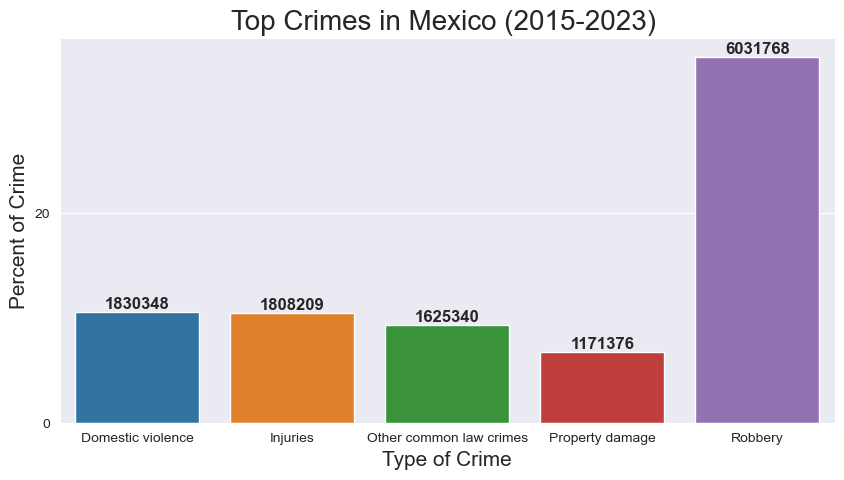

In [250]:
# bar plot of the top five crimes for the given year composed of the percent they made up for this timeframe
# labeled with the count of these crimes (i.e. the number used when calculating the percentages)
plt.figure(figsize=(10,5))
top_crime_bar_plot = sns.barplot(top_five_crimes_df,x='type_of_crime',y='percent')
plt.bar_label(top_crime_bar_plot.containers[0],labels=top_five_crimes_df['crime_count'],fontsize=12,weight='bold')
plt.title('Top Crimes in Mexico (2015-2023) ',fontsize=20)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Percent of Crime',fontsize=15)
plt.xlabel('Type of Crime',fontsize=15)
plt.show()

#### Quick  Insight:
It seems that Robbery has always been on top significantly for 2015-2023 making up about 35% with total count of 6,031,768.

### Crime Type Trends Analysis

#### Felony Crime Analysis

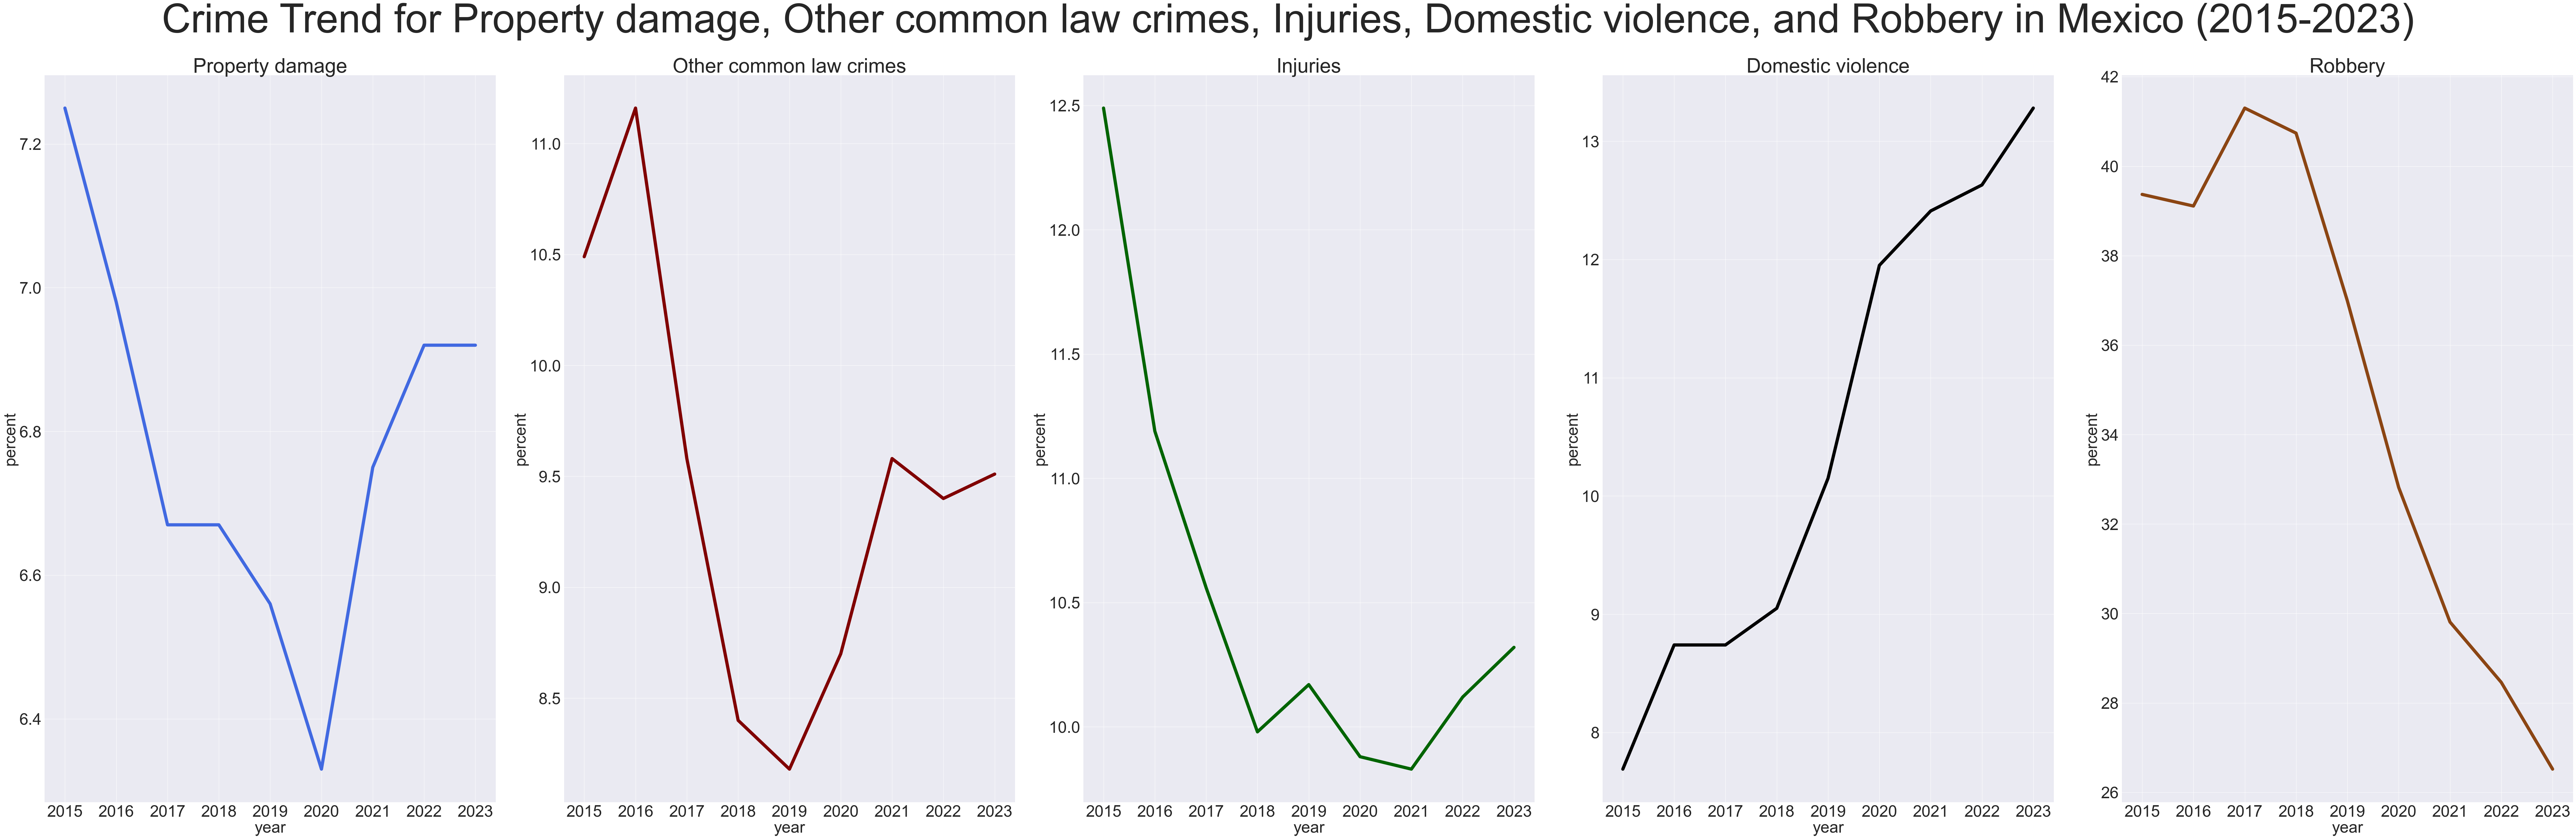

In [251]:
crime_stat_range(top_crimes_2023,facet=True)



#### Insight:
Notable observations reveal that domestic violence has increased by 5% over an 8-year period, while robbery has declined by 13% during the same timeframe. This prompts the question, Is the Mexican government concentrating on reducing crimes of a robbery nature? As discussed in the Problem Statement and Importance section of my Introduction, Mexico is trying to decrease crime rates by having it be more expensive when it comes to commiting a crime. This action seems to align with the decreasing trend in robbery rates depicted in the plot above. Could it be that committing crimes at home has become a more cost-effective option?  I will attempt to answer former question with same plot but with crimes in relative to robbery.

In [252]:
crime_types

array(['Homicide', 'Injuries', 'Feminicide', 'Abortion',
       'Other crimes against life and bodily integrity', 'Kidnapping',
       'Child trafficking', 'Abduction',
       'Other crimes against personal freedom', 'Sexual abuse',
       'Sexual harassment', 'Simple rape', 'Aggravated rape', 'Incest',
       'Other crimes against sexual freedom and security', 'Robbery',
       'Fraud', 'Embezzlement', 'Extortion', 'Property damage',
       'Dispossession', 'Other crimes against heritage or property',
       'Domestic violence',
       'Gender-based violence in all its forms other than domestic violence',
       'Non-compliance with family support obligations',
       'Other crimes against the family', 'Corruption of minors',
       'Human trafficking', 'Other crimes against society',
       'Drug trafficking (small-scale)', 'Threats', 'Burglary',
       'Prisoner escape', 'Forgery', 'Counterfeiting',
       'Environmental crimes', 'Crimes committed by public officials',
       'Elect

In [253]:
crimes_sim_to_rob = ['Burglary','Fraud','Extortion','Dispossession','Threats']

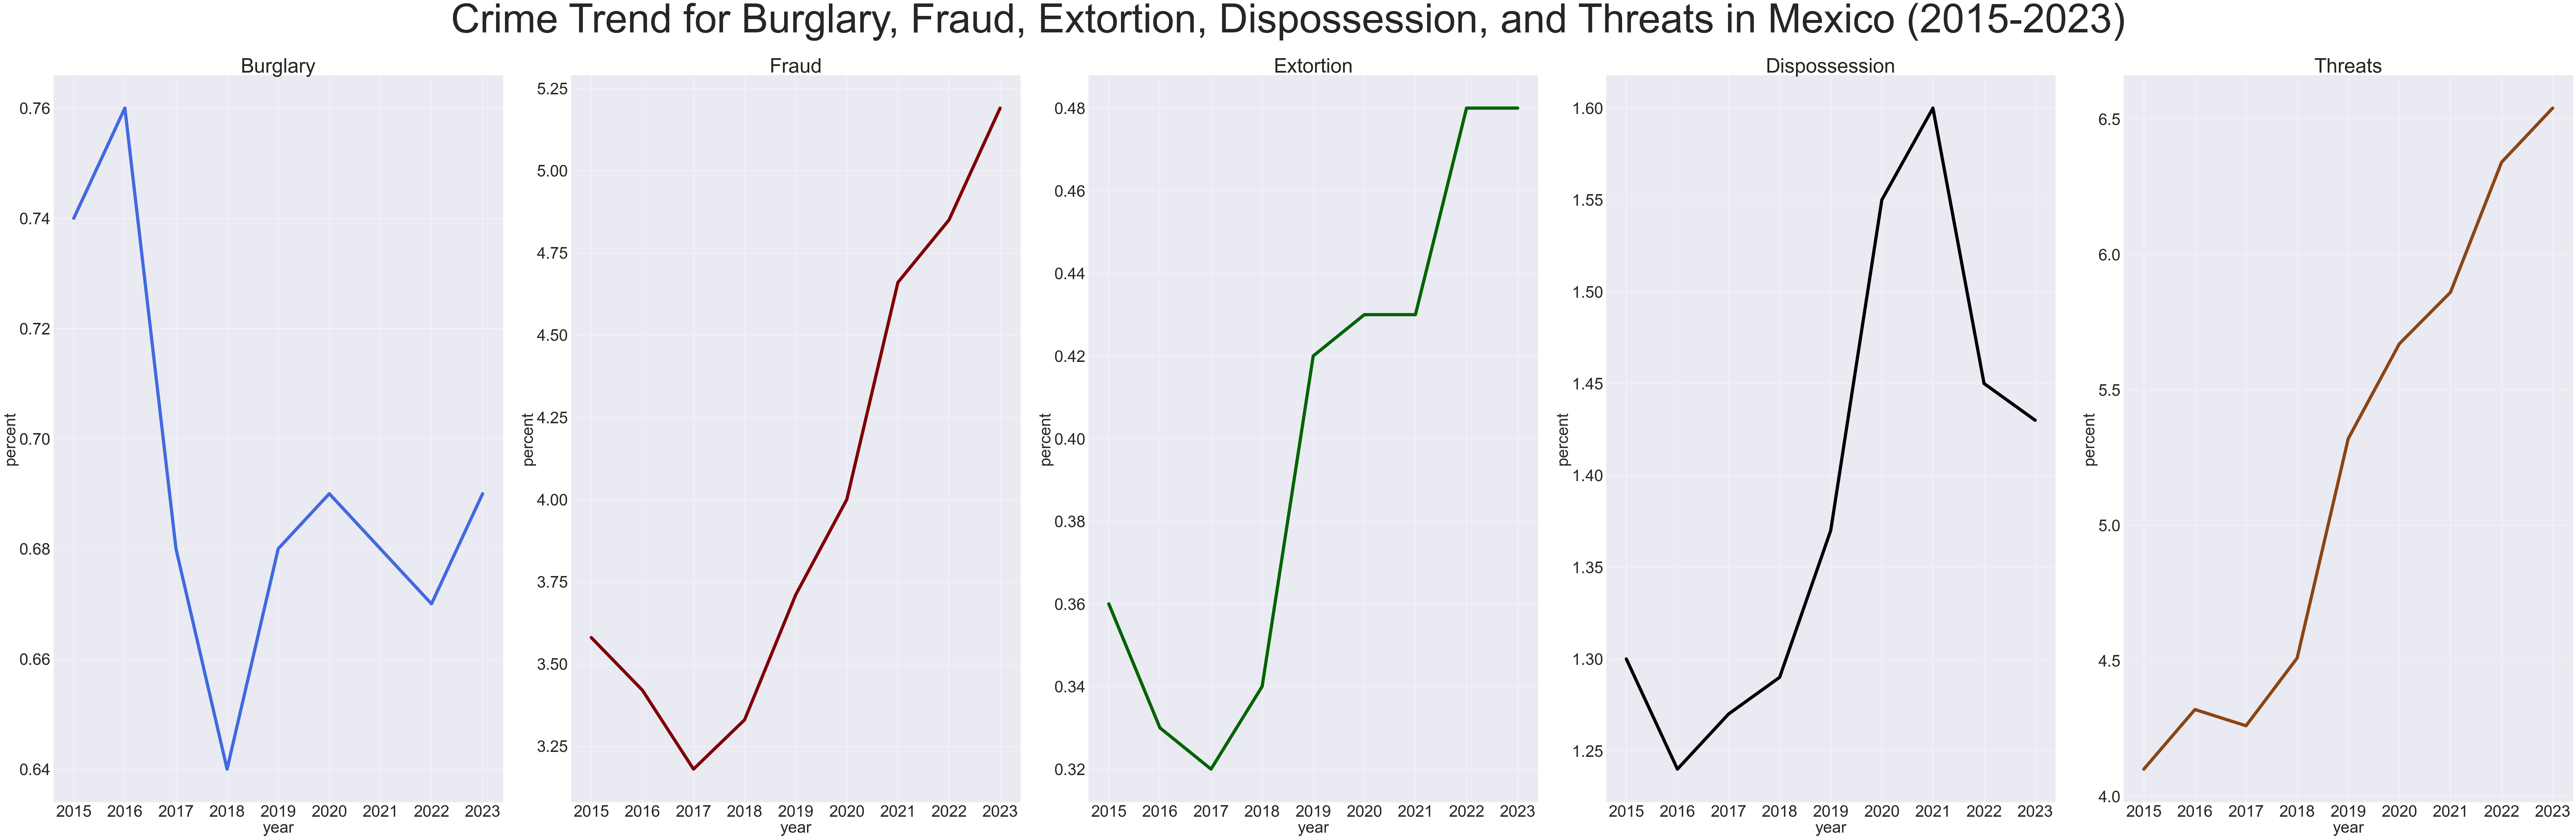

In [254]:
crime_stat_range(crimes_sim_to_rob,facet=True)

#### Quick Insight:
For the majority there is no signifcant increase or decrease. Yet, for fraud and threats there has been about 2% increase. To answer the question I will negate it by saying that Mexico is fixating on robbery.


#### Violent Crimes Analysis

In [255]:
violent_crime = ['Homicide','Feminicide','Kidnapping','Child trafficking','Sexual abuse']

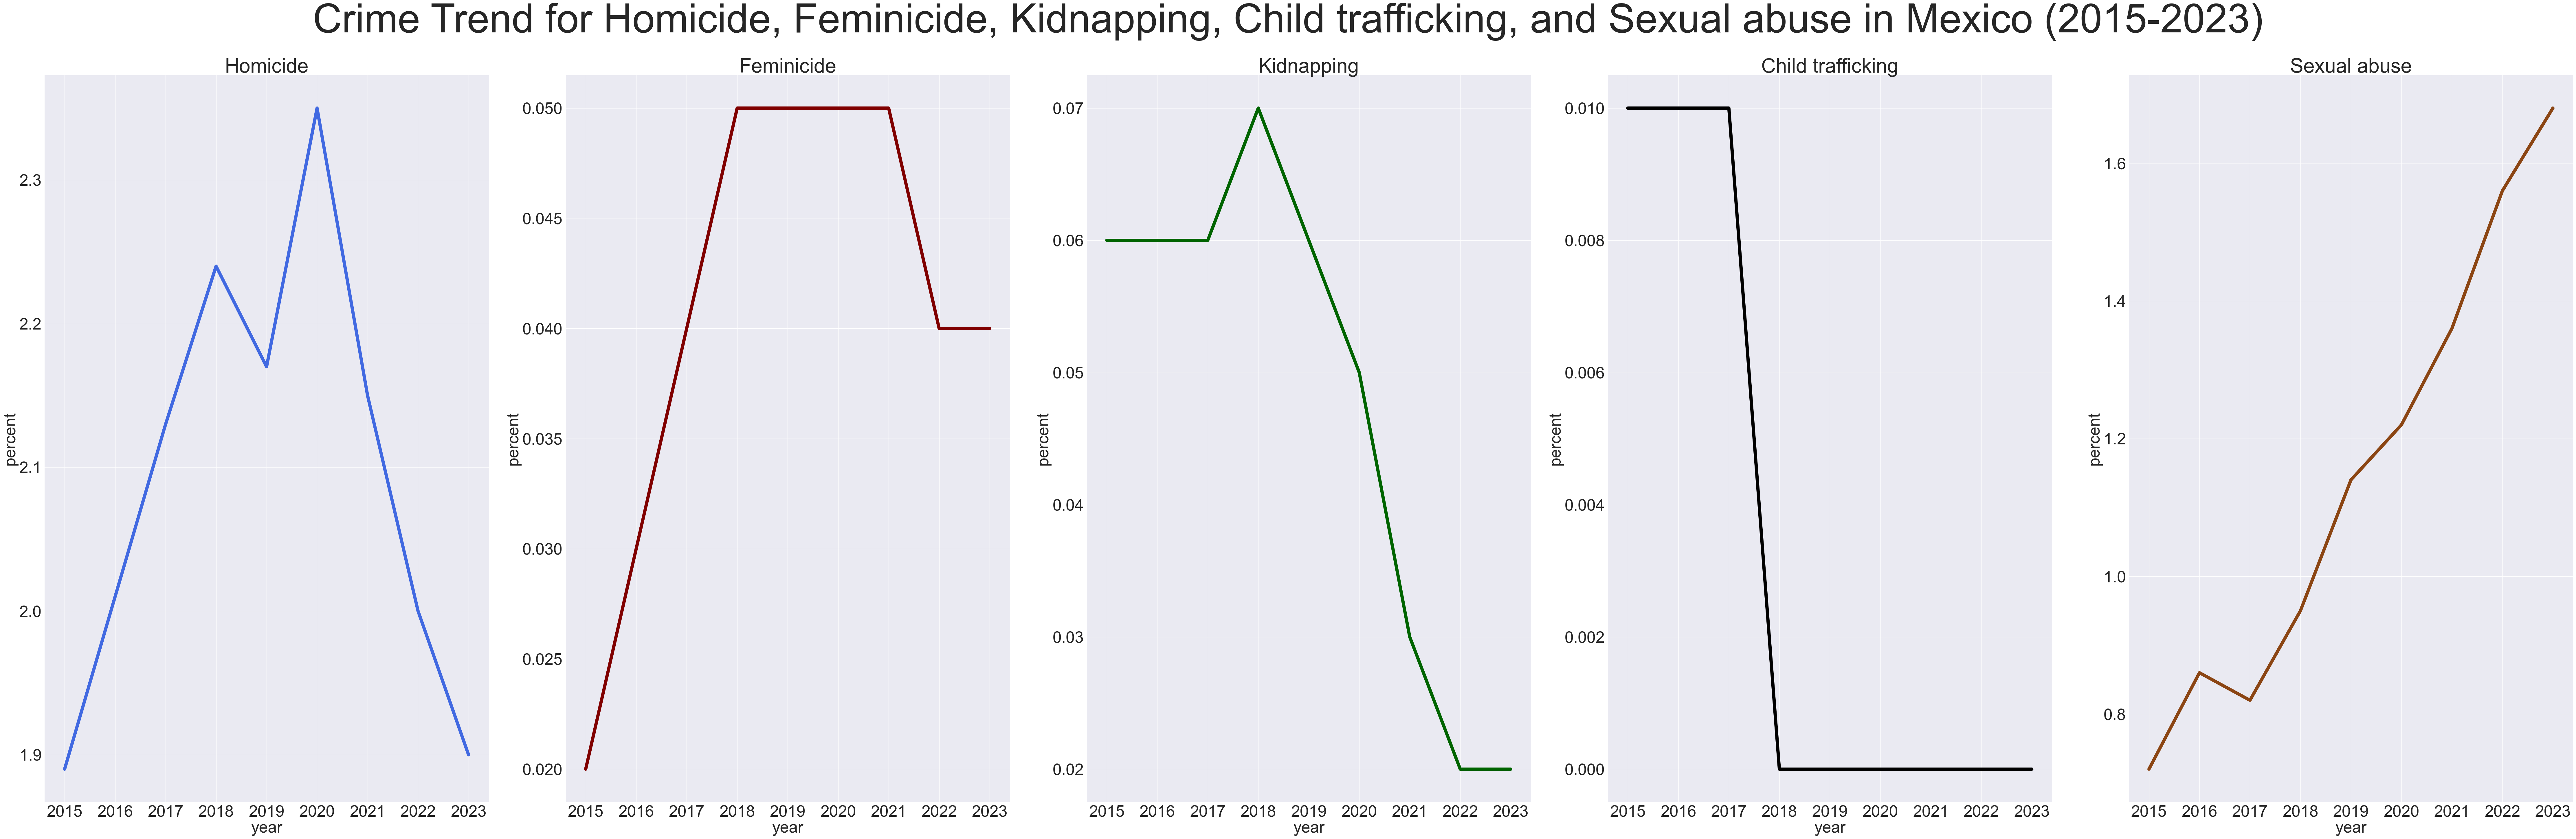

In [256]:
crime_stat_range(violent_crime,facet=True)

#### Quick Insight:

Violent Crimes tend to be under 3%, Which is good to know.

## GDP and Types of Crimes
#### Goals:
- Find, if any, significant correlations between types of crime and GDP

### Query Prep

In [257]:
def crime_count_range(crimes):
    """
    [string(5)]  -> list subplots(5)
    
    expect a list of 5 crimes types (strings)
    which will then return a list of the correlation coefficient for each given crime when mapped with gdp
    also be faceted to demonstrate the their correlation with GDP in their counts for 2015-2023
    """
    if len(crimes) == 5:

        df_values = [(crime,year,spefic_crime_count(crime,year),spefic_crime_stat(crime,year)) 
             for crime in crime_types 
             for year in years ] #list of tuples  (type_of_crime,year,crime_count,percent)
    
        # dataframe with crimes for 2015-2023 and the the respective count,percent for the years
        top_crime_thru_years = pd.DataFrame({'type_of_crime':[df_values[i][0] for i in np.arange(len(df_values))],
                                    'year':[df_values[i][1] for i in np.arange(len(df_values))],
                                    'crime_count':[df_values[i][2] for i in np.arange(len(df_values))],
                                    'percent':[df_values[i][3] for i in np.arange(len(df_values))]})
        #dataframes containing the count for each crime in the given list
        crime1_df = top_crime_thru_years.loc[top_crime_thru_years['type_of_crime'] == crimes[0]]
        crime2_df = top_crime_thru_years.loc[top_crime_thru_years['type_of_crime'] == crimes[1]]
        crime3_df = top_crime_thru_years.loc[top_crime_thru_years['type_of_crime'] == crimes[2]]
        crime4_df = top_crime_thru_years.loc[top_crime_thru_years['type_of_crime'] == crimes[3]]
        crime5_df = top_crime_thru_years.loc[top_crime_thru_years['type_of_crime'] == crimes[4]]
        crime_dfs = [crime1_df,crime2_df,crime3_df,crime4_df,crime5_df]
        #join the dfs above with the gdp values
        crime_dfs_gdp = [df.merge(rel_mex_gdp,on='year') for df in crime_dfs]
        
        fig,ax = plt.subplots(1,5,figsize=(100,30))
        
        plots = [sns.scatterplot(df,y='gdp',x='crime_count',hue='year',alpha=0.7,legend='full',
                                 palette='tab10',s= 6000,ax = ax[i%5]) for i,df in enumerate(crime_dfs_gdp) ]
        
        
        [plots[i].set_title(crimes[i],fontsize=70) for i in np.arange(5)]
        [plots[i].ticklabel_format(style='plain', axis='both') for i in np.arange(5)]
        [plots[i].legend(markerscale=8.0) for i in np.arange(5)]
        [plots[i].set_xlabel('Crime Count',fontsize=70) for i in np.arange(5)]
        [plots[i].set_ylabel('GDP (Millions)',fontsize=70) for i in np.arange(5)]
        

        
        
        fig.suptitle(f"Crime and GDP Correlation for {crimes[0]}, {crimes[1]}, {crimes[2]}, {crimes[3]}, and {crimes[4]} in Mexico (2015-2023)",fontsize = 100)
        plt.tight_layout()
        
        
        corls_coefs = [correlation(crime_dfs_gdp[i],'crime_count','gdp') for i in np.arange(5)]
        
        statements = [f"The correlation coefficient for {crime_dfs_gdp[i].type_of_crime[0]} is {round(corls_coefs[i],2)}" 
                      for i in np.arange(5)]
        return statements
    else:
        return ("Please provide a list only 5 crime types, use the following list for refrence.",list(crime_types))
         
        

### Finding the highest correlation coefficients

#### Manipulating a df sorted by correlation coefficients

In [258]:
# split up all crime types into a single df so they can each be joined with gdp values
num_list_crimes = np.arange(len(crime_types))
crimes_dfs = [top_crime_thru_years.loc[top_crime_thru_years['type_of_crime'] == crime_types[i]] for i in np.arange(39)]
num_list_crime_dfs = np.arange(len(crimes_dfs))
crime_dfs_with_gdp = [crimes_dfs[i].merge(rel_mex_gdp,on='year') for i in num_list_crime_dfs]
                       



In [269]:
# add a correlation coefficients column to df

crime_dfs_cc = [crime_dfs_with_gdp[i].assign(corr_r = correlation(crime_dfs_with_gdp[i],'crime_count','gdp')) for i in num_list_crime_dfs]


In [260]:
# putting all those df on top of each other using pd.concat

crime_df_union = pd.concat(crime_dfs_cc).reset_index()
crime_df_final = crime_df_union.drop('index',axis=1)


In [261]:
# sorting for the positve correlations
posi_crime = crime_df_final.sort_values(['corr_r','year'],ascending=[False,True])
posi_crime.head()

type_of_crime  year  crime_count  percent         gdp    corr_r
297       Forgery  2015         2568     0.15  1082369.18  0.754628
298       Forgery  2016         2775     0.16  1101264.36  0.754628
299       Forgery  2017         2953     0.15  1121829.64  0.754628
300       Forgery  2018         3167     0.16  1143681.80  0.754628
301       Forgery  2019         3512     0.17  1140266.26  0.754628

#### Quick Insight:
Its intersting to see that forgery has a high correlation with gdp.

## Query on crimes and their respective Correlation Coefficients

['The correlation coefficient for Property damage is 0.58',
 'The correlation coefficient for Other common law crimes is 0.18',
 'The correlation coefficient for Injuries is 0.32',
 'The correlation coefficient for Domestic violence is 0.34',
 'The correlation coefficient for Robbery is -0.02']

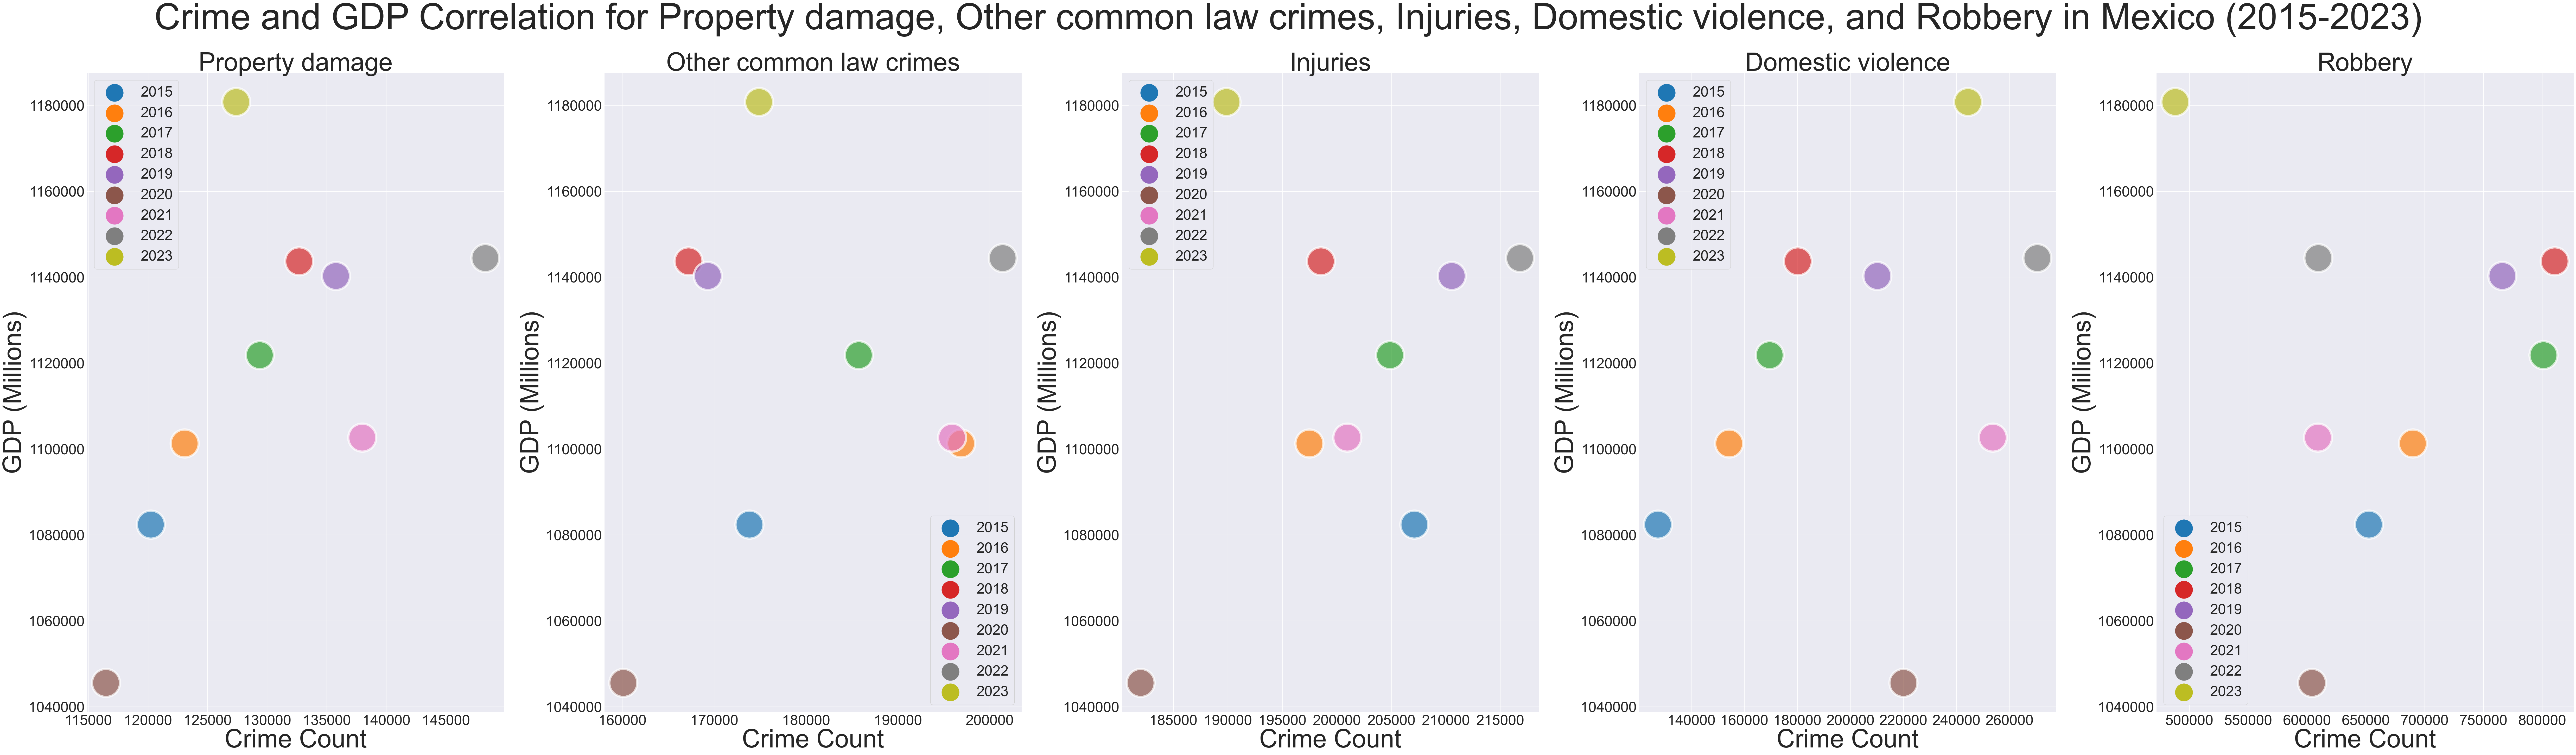

In [262]:
crime_count_range(top_crimes_all_years)

#### Quick Insight:
Looking at the top five crime for 2015-2023 it seems that there may be some correlation for property when mapped with GDP, compred to the other plots.

In [263]:
# get the top five crime with high correlation
top_r = pd.unique(posi_crime.type_of_crime)[:5]


['The correlation coefficient for Forgery is 0.75',
 'The correlation coefficient for Property damage is 0.58',
 'The correlation coefficient for Other crimes against personal freedom is 0.57',
 'The correlation coefficient for Sexual harassment is 0.49',
 'The correlation coefficient for Sexual abuse is 0.49']

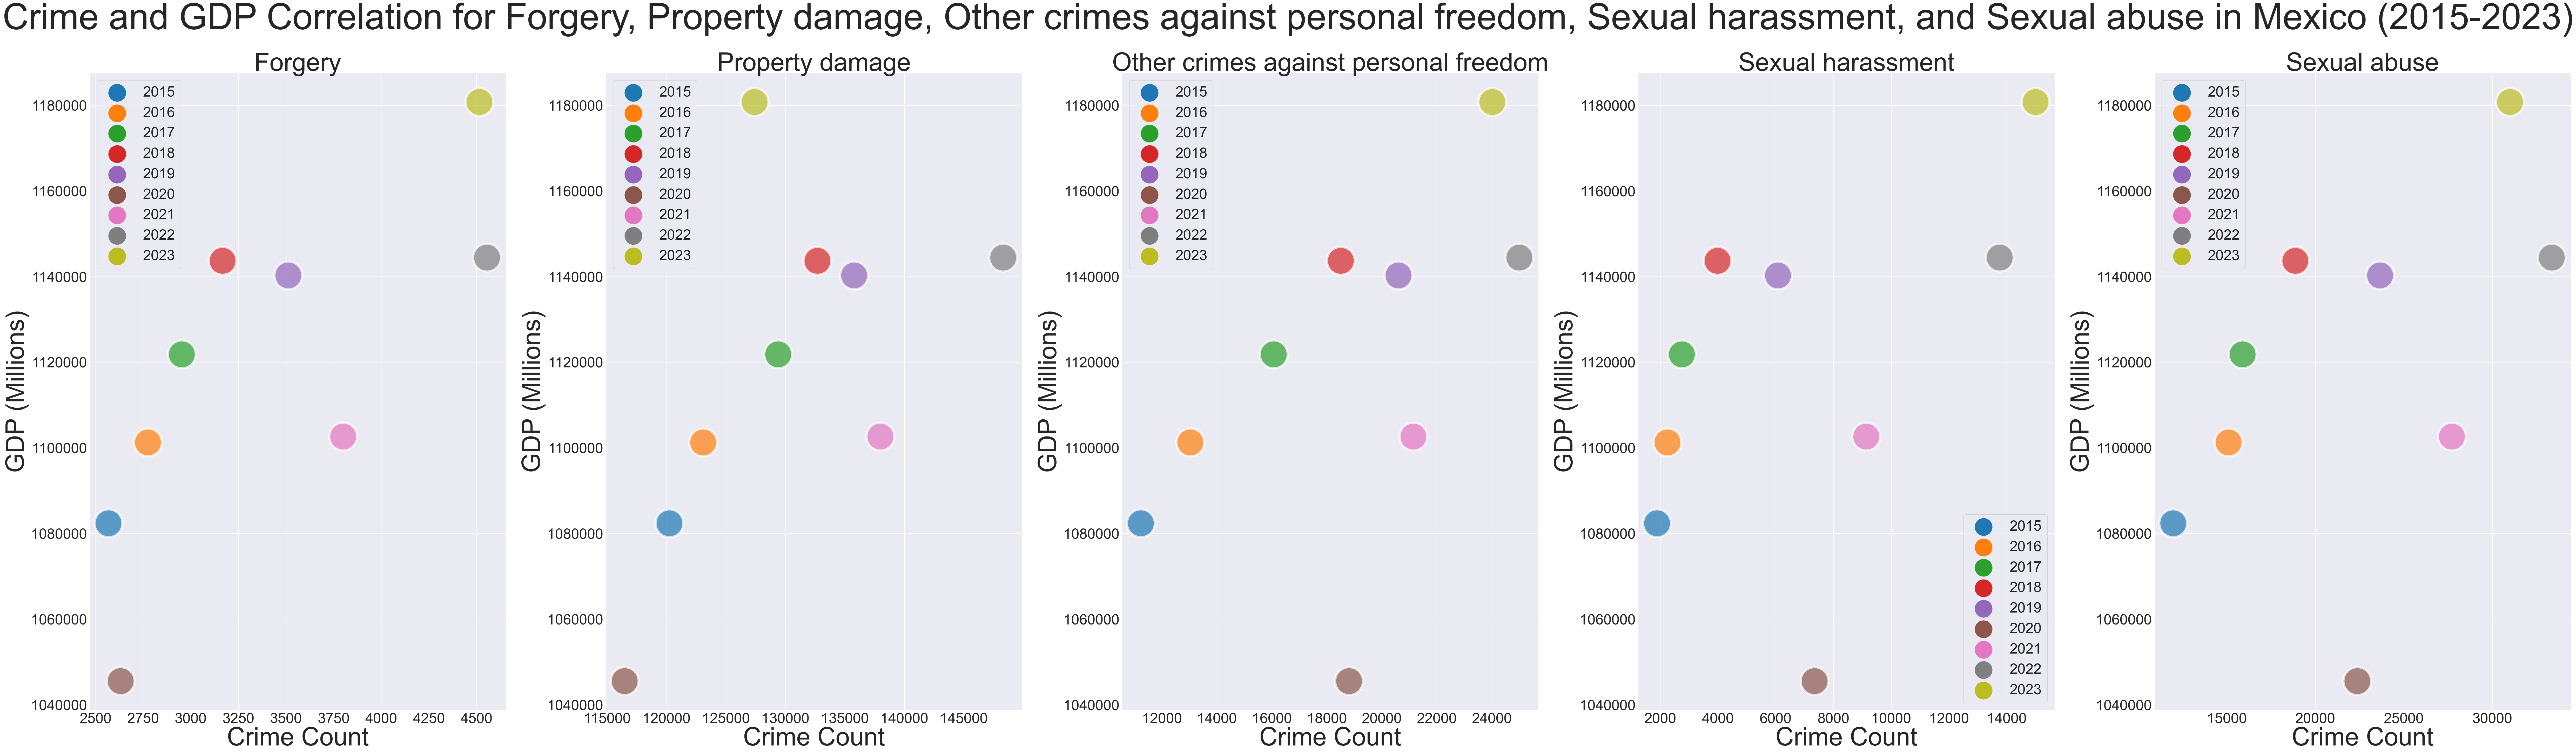

In [264]:
crime_count_range(top_r)

#### Insight:
All these plots have 2023 associated with high values for GDP and Crime count in contrast to 2020, which lays below in the plot for all facets. Also, it seems that from 2015 through 2019 and from 2021 to 2022, the points follow a similar path. Interesting behavior from these points that have a positive correlation.

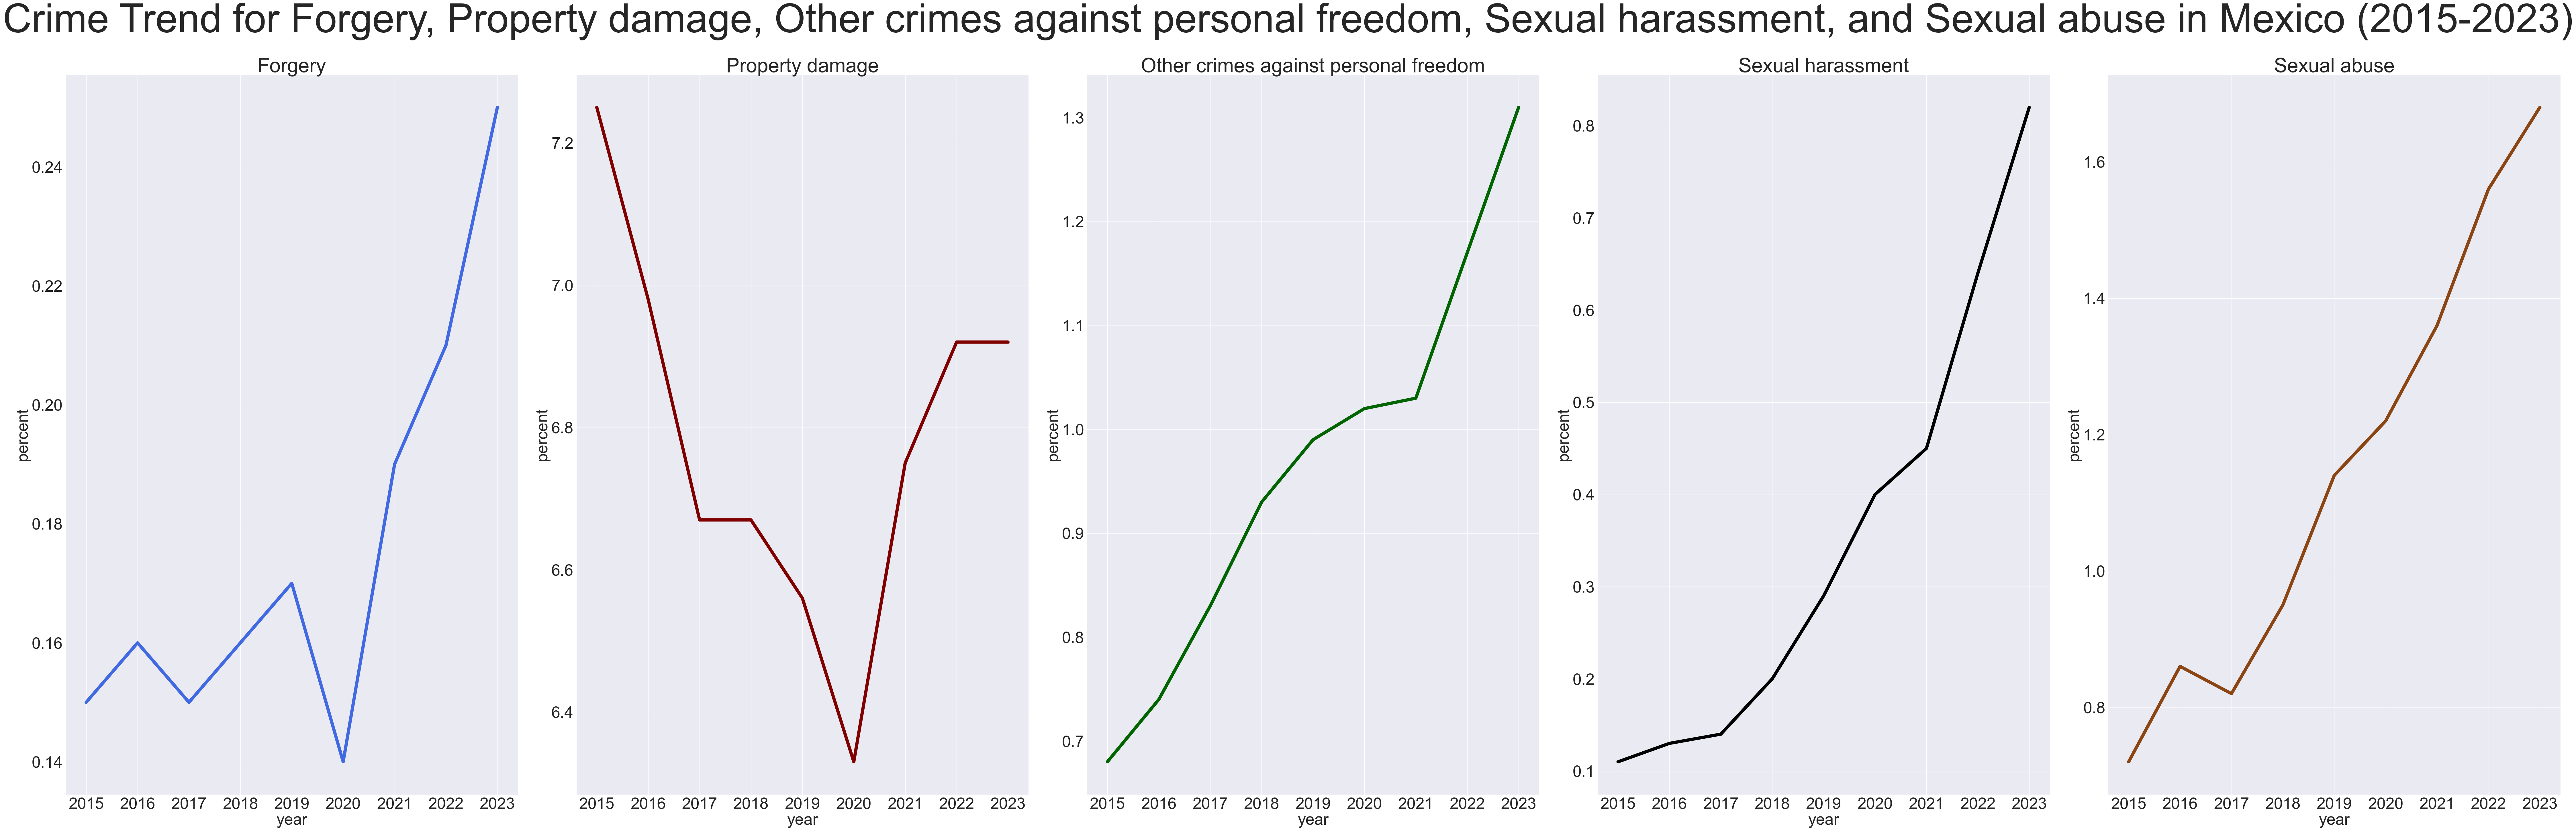

In [265]:
crime_stat_range(top_r,facet=True)

#### Insight:
Although, having a high correlation it seems that their is no signifcant increase or decrease for these crimes, the fluctuation of these crimes fails to pass even one percent. So we can say the even though they had a high correlation for 2015-2023 when mapped with GDP values, it does not mean they cause a high GDP value for Mexico.

### looking at the top five negatively correlated crimes


In [266]:
low_r = pd.unique(posi_crime.type_of_crime)[34:]


['The correlation coefficient for Incest is -0.12',
 'The correlation coefficient for Kidnapping is -0.2',
 'The correlation coefficient for Child trafficking is -0.23',
 'The correlation coefficient for Prisoner escape is -0.29',
 'The correlation coefficient for Abduction is -0.53']

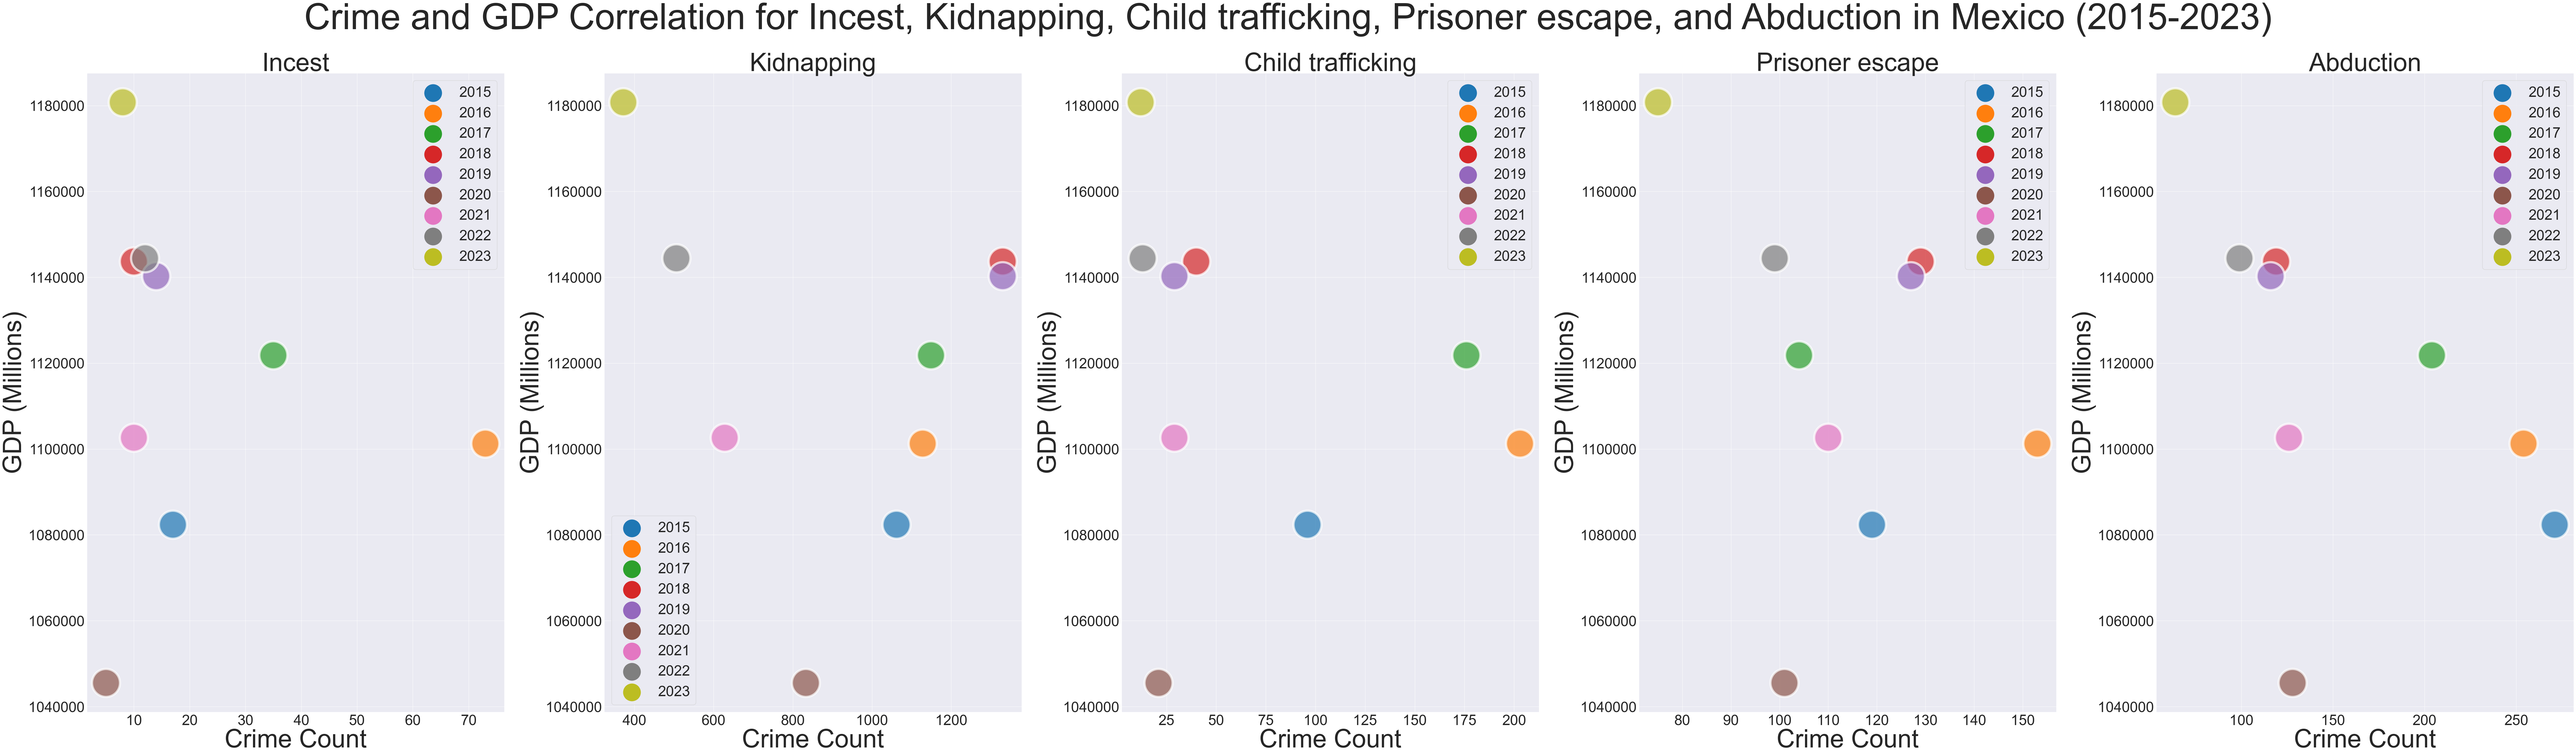

In [267]:
crime_count_range(low_r)

#### Quick Insight:
2018 and 2019 tend to overlap with each other. Other than i will say that they are obviously negatively correlated when mapped with GDP.

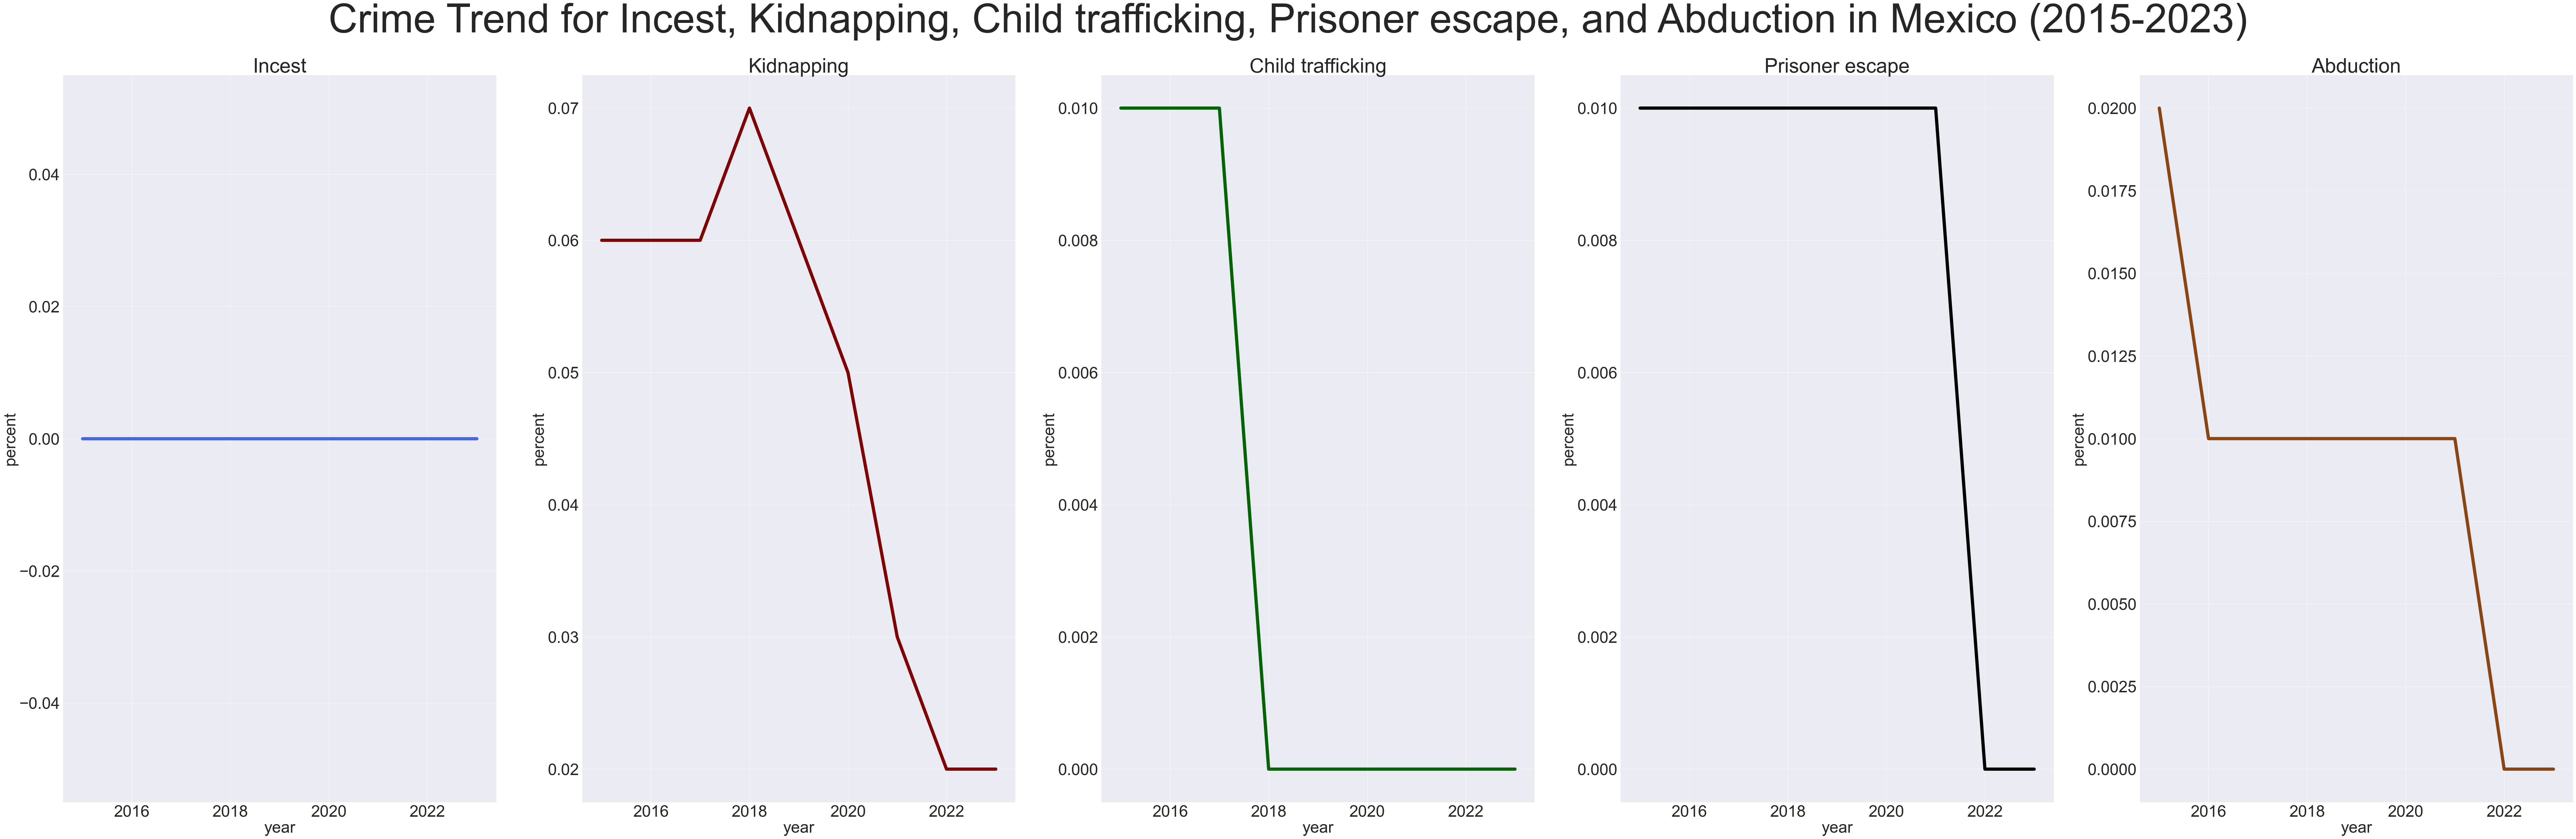

In [268]:
crime_stat_range(low_r,facet=True)

#### Quick Insight:
They never tend to pass 1%. Also, there just is not enough data. Which in this context is a good thing.